In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Datasets and then concatenating them into a single pandas DataFrame

In [76]:
list_of_datasets = []

for i in range(1880,2024):
    current_dataframe = pd.read_csv(f"yob{i}.txt",names=['name', 'sex', 'number'],header=None)
    current_dataframe['year'] = f"{i}"
    list_of_datasets.append(current_dataframe)
    
df = pd.concat(list_of_datasets,ignore_index=True)
df['year'] = df['year'].astype(int)
df

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2117214,Zyell,M,5,2023
2117215,Zyen,M,5,2023
2117216,Zymirr,M,5,2023
2117217,Zyquan,M,5,2023


#### Initial EDA

In [77]:
df.shape

(2117219, 4)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117219 entries, 0 to 2117218
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   number  int64 
 3   year    int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 56.5+ MB


In [79]:
df.isnull().sum()

name      0
sex       0
number    0
year      0
dtype: int64

In [80]:
df.duplicated().sum()

0

In [81]:
df.sample(5)

,name,sex,number,year
1442647,Pierce,M,512,2003
431379,Laverne,F,603,1947
617679,Cleve,M,45,1963
616842,Felix,M,613,1963
1811966,Milian,F,5,2014


[]

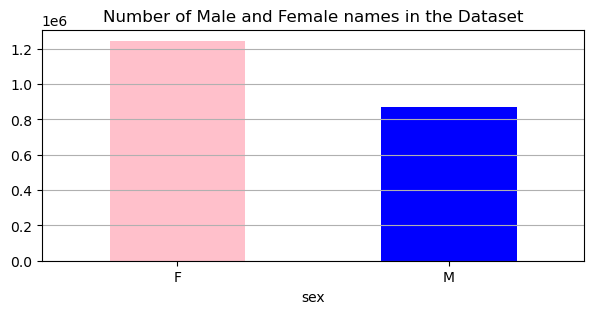

In [94]:
plt.figure(figsize=[7,3])
df['sex'].value_counts().plot(kind='bar',color=['pink','blue'])
plt.grid(axis='y')
plt.title('Number of Male and Female names in the Dataset')
plt.xticks(rotation=0)
plt.plot()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

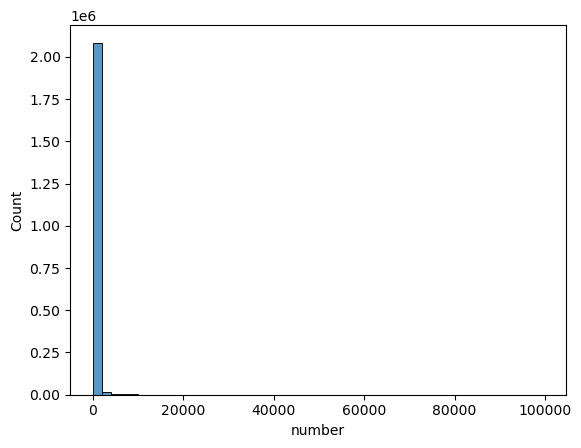

In [102]:
sns.histplot(df['number'],bins=50)
plt.plot()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

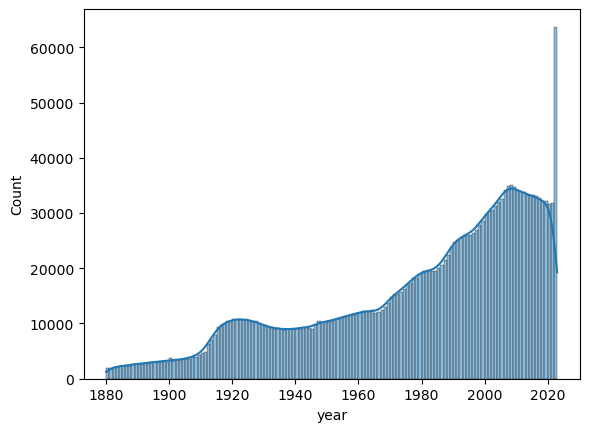

In [105]:
sns.histplot(df['year'],kde=True,bins=143)
plt.plot()

<Axes: xlabel='name'>

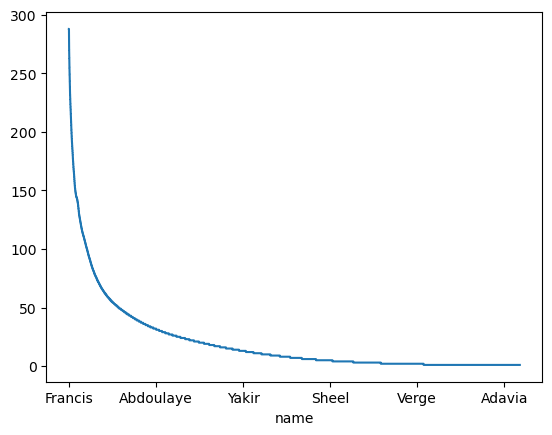

In [110]:
df['name'].value_counts().plot()

In [111]:
df[['year','number']].corr()

,year,number
year,1.000000,-0.027563
number,-0.027563,1.000000


### Basic Statistic

##### total births by year

In [123]:
total_births_by_year = df.groupby('year').agg(['sum'])['number']
total_births_by_year.shape

(144, 1)

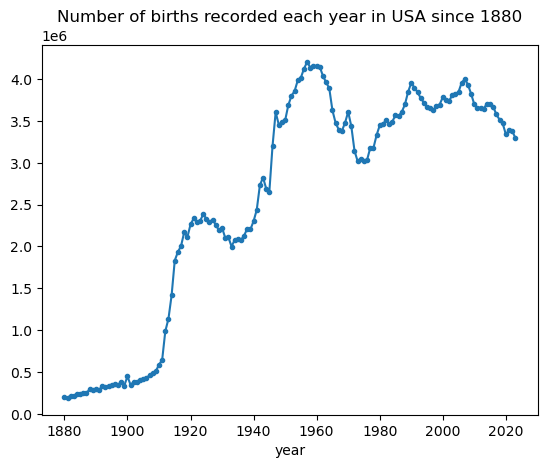

In [128]:
total_births_by_year.plot(marker='.')
plt.title('Number of births recorded each year in USA since 1880')
plt.legend().remove()

In [150]:
year_with_max_birth = total_births_by_year[total_births_by_year['sum'] == total_births_by_year.max()[0]].index[0]
year_with_min_birth = total_births_by_year[total_births_by_year['sum'] == total_births_by_year.min()[0]].index[0]

C:\Users\Dell\AppData\Local\Temp\ipykernel_9252\917689492.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year_with_max_birth = total_births_by_year[total_births_by_year['sum'] == total_births_by_year.max()[0]].index[0]
C:\Users\Dell\AppData\Local\Temp\ipykernel_9252\917689492.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year_with_min_birth = total_births_by_year[total_births_by_year['sum'] == total_births_by_year.min()[0]].index[0]


In [152]:
print('Year with max births is ',year_with_max_birth)
print('Year with min births is ',year_with_min_birth)

Year with max births is  1957
Year with min births is  1881


##### Gender Breakdown

In [199]:
gender_breakdown = df.groupby(['year', 'sex'])['number'].sum().unstack(fill_value=0)
gender_breakdown

sex,F,M
year,,
1880,90994,110490
1881,91953,100735
1882,107847,113686
1883,112320,104625
1884,129019,114442
...,...,...
2019,1676568,1792223
2020,1614196,1723649
2021,1638188,1746499


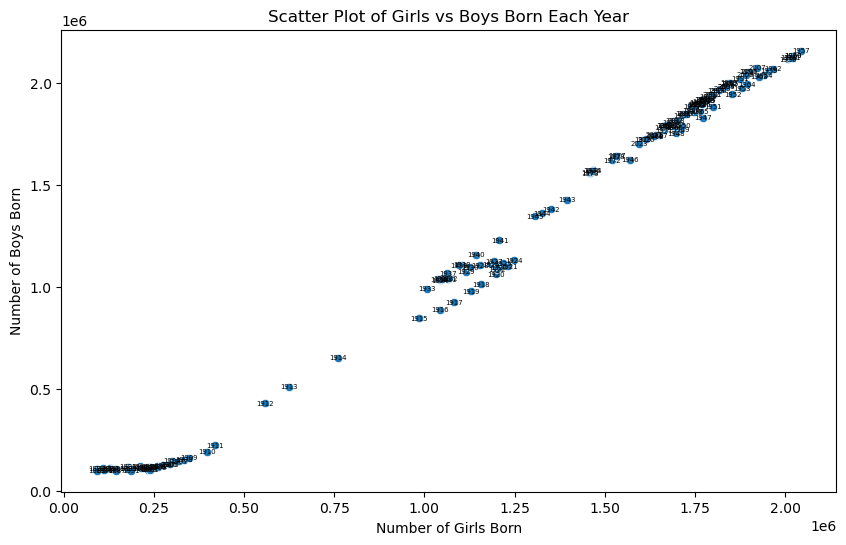

In [200]:
gender_breakdown = gender_breakdown.reset_index()
gender_breakdown.columns = ['year', 'girl', 'boy']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='girl', y='boy', data=gender_breakdown)

# Annotate points with the year
for i in range(gender_breakdown.shape[0]):
    plt.text(gender_breakdown['girl'].iloc[i] + 50, gender_breakdown['boy'].iloc[i] + 50, 
             gender_breakdown['year'].iloc[i], 
             fontsize=5, ha='center', va='center')

plt.title('Scatter Plot of Girls vs Boys Born Each Year')
plt.xlabel('Number of Girls Born')
plt.ylabel('Number of Boys Born')
plt.show()

### Trend Analysis

##### Yearly Trends

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


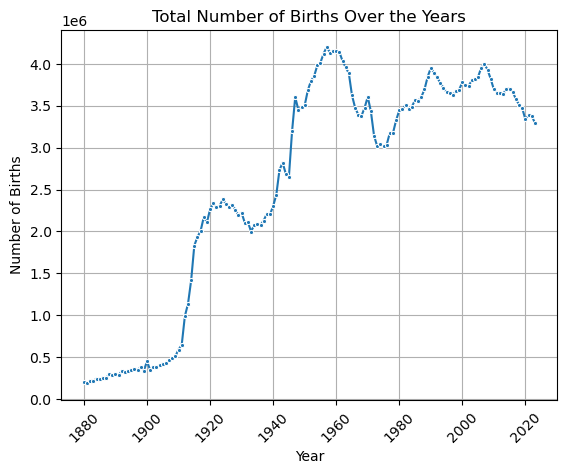

In [204]:
total_births = df.groupby('year')['number'].sum().reset_index()
sns.lineplot(x='year', y='number', data=total_births, marker='.')
plt.title('Total Number of Births Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.grid()
plt.xticks(rotation=45)
plt.show()

##### Checking trends of few names Over Time

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas.

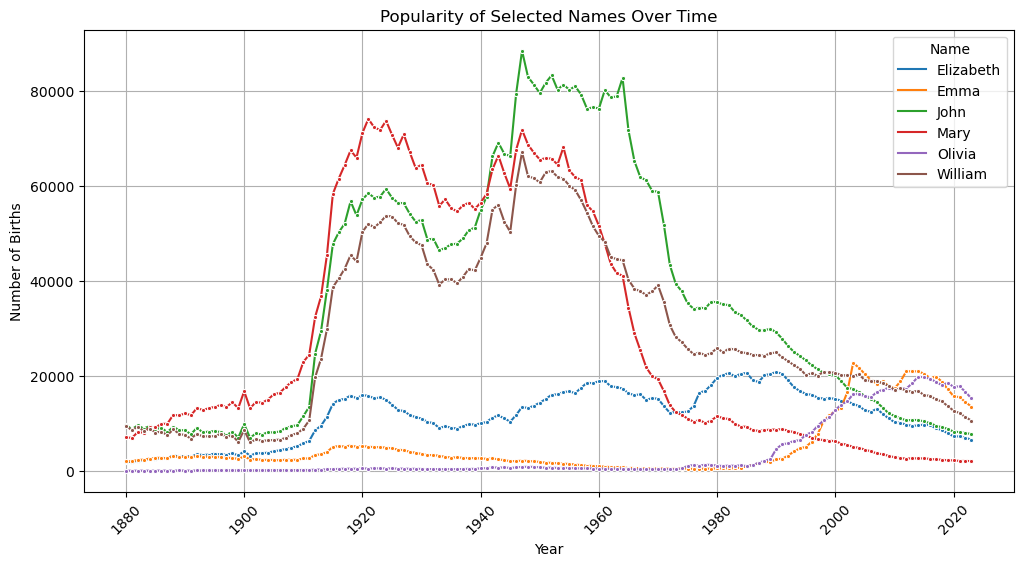

In [237]:
names_to_analyze = ['Mary', 'Emma', 'Olivia', 'Elizabeth', 'John', 'William']
filtered_data = df[df['name'].isin(names_to_analyze)]

popularity_over_time = filtered_data.groupby(['year', 'name'])['number'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='number', hue='name', data=popularity_over_time, marker='.')
plt.title('Popularity of Selected Names Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend(title='Name')
plt.grid()
plt.xticks(rotation=45)
plt.show()

### Most Popular Names

##### Top 10 Names year-wise

In [223]:
grouped_data = df.groupby(['year', 'name'])['number'].sum().reset_index()
grouped_data

,year,name,number
0,1880,Aaron,102
1,1880,Ab,5
2,1880,Abbie,71
3,1880,Abbott,5
4,1880,Abby,6
...,...,...,...
1932566,2023,Zyrie,13
1932567,2023,Zyrin,5
1932568,2023,Zyrus,14
1932569,2023,Zyshawn,6


In [ ]:
# Get the top 10 names for each year
top_names = grouped_data.groupby('year').apply(lambda x: x.nlargest(10, 'number')).reset_index(drop=True)

In [224]:
top_names

,year,name,number
0,1880,John,9701
1,1880,William,9562
2,1880,Mary,7092
3,1880,James,5949
4,1880,Charles,5359
...,...,...,...
1435,2023,Charlotte,12610
1436,2023,Amelia,12318
1437,2023,Sophia,11952
1438,2023,James,11749


##### Compare by Gender 

In [ ]:
boys_data = df[df['sex'] == 'M']
girls_data = df[df['sex'] == 'F']

top_boys = boys_data.groupby('name')['number'].sum().nlargest(10).reset_index()
top_girls = girls_data.groupby('name')['number'].sum().nlargest(10).reset_index()

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

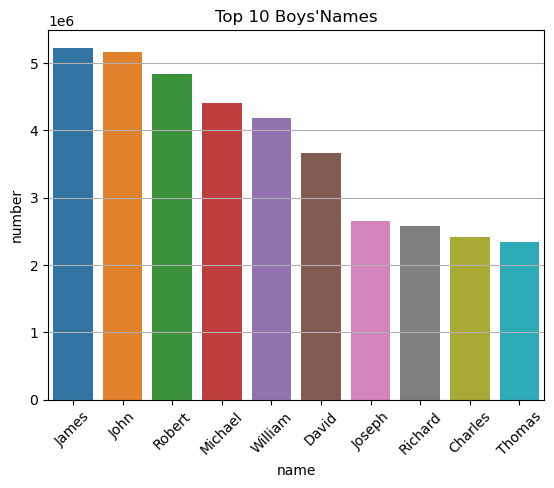

In [235]:
plt.figure()
sns.barplot(top_boys,x='name',y='number')
plt.title("Top 10 Boys'Names")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

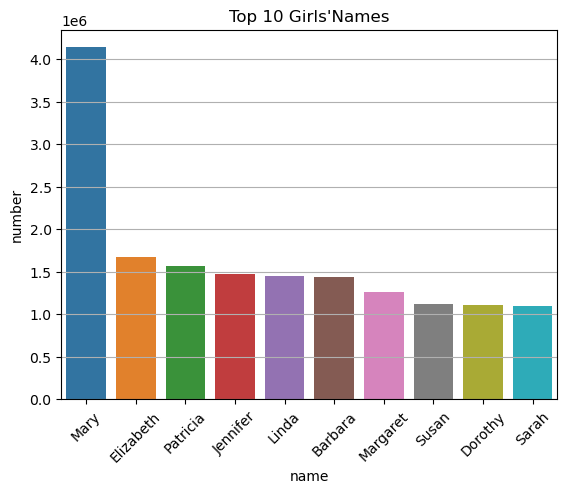

In [236]:
plt.figure()
sns.barplot(top_girls,x='name',y='number')
plt.title("Top 10 Girls'Names")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.plot

### Gender Distribution

##### Birth Ratio (Boys to Girls) over time

In [240]:
gender_totals = df.groupby(['year', 'sex'])['number'].sum().unstack(fill_value=0)

# Calculate the birth ratio: boys to girls
gender_totals['birth_ratio'] = gender_totals['M'] / gender_totals['F']
birth_ratios = gender_totals.reset_index()

print('How many boys were born compared to girls')
print(birth_ratios[['year', 'birth_ratio']])

How many boys were born compared to girls
sex  year  birth_ratio
0    1880     1.214256
1    1881     1.095505
2    1882     1.054142
3    1883     0.931490
4    1884     0.887017
..    ...          ...
139  2019     1.068983
140  2020     1.067807
141  2021     1.066116
142  2022     1.064337
143  2023     1.065915

[144 rows x 2 columns]


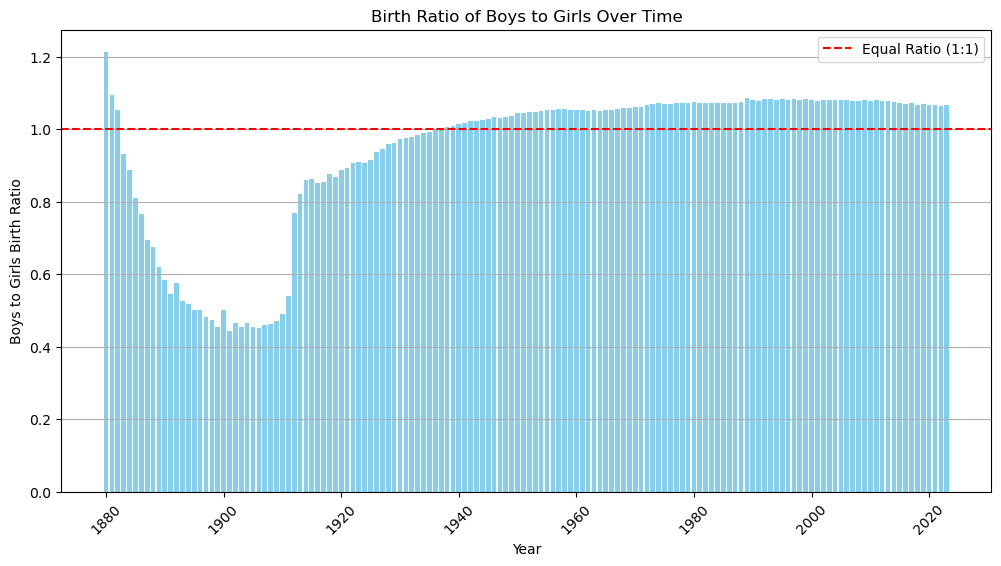

In [238]:
gender_totals = df.groupby(['year', 'sex'])['number'].sum().unstack(fill_value=0)

gender_totals['birth_ratio'] = gender_totals['M'] / gender_totals['F']
gender_totals = gender_totals.reset_index()

plt.figure(figsize=(12, 6))
plt.bar(gender_totals['year'], gender_totals['birth_ratio'], color='skyblue')
plt.title('Birth Ratio of Boys to Girls Over Time')
plt.xlabel('Year')
plt.ylabel('Boys to Girls Birth Ratio')
plt.axhline(1, color='red', linestyle='--', label='Equal Ratio (1:1)')
plt.legend()
plt.xticks(rotation=45)  
plt.grid(axis='y') 
plt.show()

### Name Popularity by Decade

##### Decadal Trends

In [257]:
df['decade'] = ((df['year'] // 10) * 10).astype(str) + 's'
df.sample(5)

,name,sex,number,year,decade
1144247,Gevonte,M,5,1992,1990s
1514433,Tywaun,M,9,2005,2000s
746147,Marcellina,F,16,1973,1970s
1473926,Erik,M,2365,2004,2000s
1981980,Diondre,M,15,2019,2010s


In [260]:
decade_grouped = df.groupby(['decade', 'name'])['number'].sum().reset_index()
decade_grouped.sample(5)

,decade,name,number
199470,1990s,Lynlee,73
304255,2010s,Krishang,67
200565,1990s,Mariachristina,18
199442,1990s,Lyndsie,533
81344,1950s,Liliane,22


In [252]:
top_names_by_decade = decade_grouped.groupby('decade').apply(lambda x: x.nlargest(10, 'number')).reset_index(drop=True)
top_names_by_decade

C:\Users\Dell\AppData\Local\Temp\ipykernel_9252\1671501413.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_names_by_decade = decade_grouped.groupby('decade').apply(lambda x: x.nlargest(10, 'number')).reset_index(drop=True)


,decade,name,number
0,1880,Mary,92030
1,1880,John,90394
2,1880,William,85246
3,1880,James,54323
4,1880,George,47980
...,...,...,...
145,2020,Charlotte,52020
146,2020,Amelia,50561
147,2020,Sophia,49991
148,2020,Elijah,49622


##### Names Over Time

In [281]:
df['decade'] = (df['year'] // 10) * 10
decade_grouped = df.groupby(['decade', 'name'])['number'].sum().reset_index()
most_popular_by_decade = decade_grouped.loc[decade_grouped.groupby('decade')['number'].idxmax()]
most_popular_by_decade[['decade', 'name', 'number']]

,decade,name,number
2380,1880,Mary,92030
6553,1890,Mary,131632
11842,1900,Mary,162187
22480,1910,Mary,480009
37678,1920,Mary,704185
54606,1930,Robert,593529
63641,1940,James,798324
78947,1950,James,846274
101733,1960,Michael,836740
126743,1970,Michael,712452


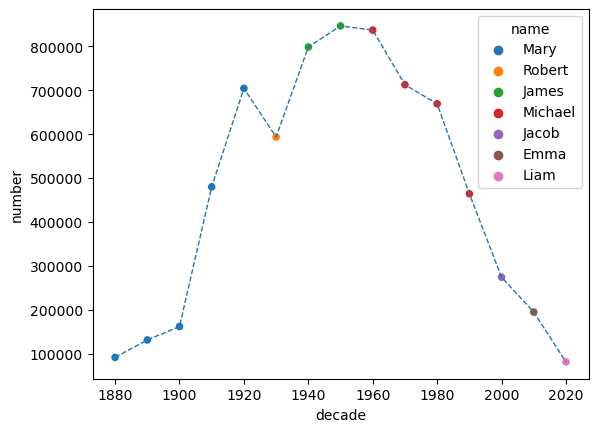

In [292]:
sns.scatterplot(x=most_popular_by_decade['decade'],
                y=most_popular_by_decade['number'],
                hue=most_popular_by_decade['name'])
plt.plot(most_popular_by_decade['decade'],
         most_popular_by_decade['number'],
         linewidth=1,
         linestyle='--')

### Name Longevity

##### List of stable names

In [296]:
df['decade'] = (df['year'] // 10) * 10
decade_grouped = df.groupby(['decade', 'name'])['number'].sum().reset_index()

top_names_by_decade = decade_grouped.groupby('decade').apply(lambda x: x.nlargest(10, 'number')).reset_index(drop=True)

# Count how many decades each name appears in
name_stability = top_names_by_decade['name'].value_counts().reset_index()
name_stability.columns = ['name', 'decade_count']

# Display names that have been in the top list for multiple decades
stable_names = name_stability[name_stability['decade_count'] > 1]
stable_names.sample(5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9252\898456840.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_names_by_decade = decade_grouped.groupby('decade').apply(lambda x: x.nlargest(10, 'number')).reset_index(drop=True)


,name,decade_count
5,Michael,6
22,Andrew,2
2,John,10
21,Ashley,2
15,Margaret,3


[]

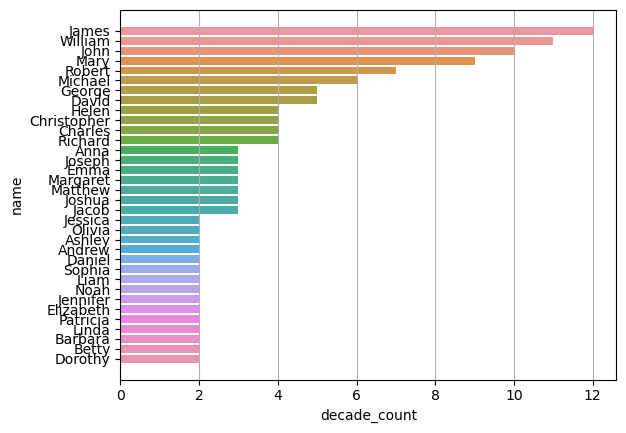

In [307]:
sns.barplot(x=stable_names['decade_count'],y=stable_names['name'])
plt.grid(axis='x')
plt.plot()

##### Lifespan of Popularity

In [312]:
df['decade'] = (df['year'] // 10) * 10
decade_grouped = df.groupby(['decade', 'name'])['number'].sum().reset_index()

top_names_by_decade = decade_grouped.groupby('decade').apply(lambda x: x.nlargest(10, 'number')).reset_index(drop=True)

# Find the first and last decade for each name
name_lifespan = top_names_by_decade.groupby('name')['decade'].agg(['min', 'max']).reset_index()
name_lifespan.columns = ['name', 'first_decade', 'last_decade']

# Calculate the lifespan of popularity
name_lifespan['lifespan'] = name_lifespan['last_decade'] - name_lifespan['first_decade']
name_lifespan_grfeaterthan_20 = name_lifespan[name_lifespan['lifespan']>20].sort_values(by='lifespan',ascending=False)
name_lifespan_grfeaterthan_20

C:\Users\Dell\AppData\Local\Temp\ipykernel_9252\496473159.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_names_by_decade = decade_grouped.groupby('decade').apply(lambda x: x.nlargest(10, 'number')).reset_index(drop=True)


,name,first_decade,last_decade,lifespan
19,Emma,1880,2020,140
26,James,1880,2020,140
51,William,1880,2010,130
31,Joseph,1880,2000,120
30,John,1880,1970,90
38,Mary,1880,1960,80
48,Robert,1910,1970,60
9,Charles,1880,1930,50
41,Michael,1950,2000,50
13,David,1940,1980,40


[]

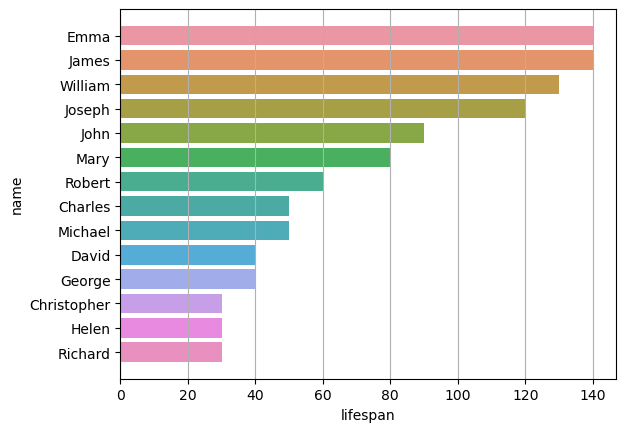

In [314]:
sns.barplot(x=name_lifespan_grfeaterthan_20['lifespan'],y=name_lifespan_grfeaterthan_20['name'])
plt.grid(axis='x')
plt.plot()

### Thematic Analysis

##### Group by Themes

In [331]:
# List of Most popular names (i.e. top 10 names of each decade)
names = [
    'John', 'William', 'Mary', 'James', 'Charles', 'George', 'Frank',
    'Joseph', 'Anna', 'Thomas', 'Henry', 'Emma', 'Elizabeth',
    'Margaret', 'Ruth', 'Helen', 'Florence', 'Dorothy', 'Robert',
    'Betty', 'Richard', 'Donald', 'Barbara', 'Shirley', 'Patricia',
    'David', 'Linda', 'Michael', 'Deborah', 'Mark', 'Debra', 'Susan',
    'Lisa', 'Kimberly', 'Michelle', 'Christopher', 'Jennifer', 'Jason',
    'Brian', 'Amy', 'Matthew', 'Melissa', 'Joshua', 'Amanda',
    'Jessica', 'Daniel', 'Ashley', 'Andrew', 'Justin', 'Brittany',
    'Tyler', 'Brandon', 'Taylor', 'Jacob', 'Nicholas', 'Austin',
    'Emily', 'Hannah', 'Madison', 'Ethan', 'Anthony', 'Isabella',
    'Jayden', 'Alexander', 'Sophia', 'Olivia', 'Mason', 'Noah', 'Liam',
    'Ava', 'Logan', 'Oliver', 'Elijah', 'Charlotte', 'Amelia'
]

# Define a comprehensive mapping of names to themes
theme_mapping = {
    'John': 'Historical', 'William': 'Historical', 'Mary': 'Nature',
    'James': 'Historical', 'Charles': 'Historical', 'George': 'Historical',
    'Frank': 'Historical', 'Joseph': 'Historical', 'Anna': 'Nature',
    'Thomas': 'Historical', 'Henry': 'Historical', 'Emma': 'Nature',
    'Elizabeth': 'Historical', 'Margaret': 'Historical', 'Ruth': 'Nature',
    'Helen': 'Nature', 'Florence': 'Historical', 'Dorothy': 'Nature',
    'Robert': 'Historical', 'Betty': 'Nature', 'Richard': 'Historical',
    'Donald': 'Historical', 'Barbara': 'Nature', 'Shirley': 'Nature',
    'Patricia': 'Nature', 'David': 'Historical', 'Linda': 'Nature',
    'Michael': 'Historical', 'Deborah': 'Nature', 'Mark': 'Historical',
    'Debra': 'Nature', 'Susan': 'Nature', 'Lisa': 'Nature',
    'Kimberly': 'Nature', 'Michelle': 'Nature', 'Christopher': 'Historical',
    'Jennifer': 'Nature', 'Jason': 'Historical', 'Brian': 'Historical',
    'Amy': 'Virtue', 'Matthew': 'Historical', 'Melissa': 'Nature',
    'Joshua': 'Historical', 'Amanda': 'Nature', 'Jessica': 'Nature',
    'Daniel': 'Historical', 'Ashley': 'Nature', 'Andrew': 'Historical',
    'Justin': 'Historical', 'Brittany': 'Nature', 'Tyler': 'Historical',
    'Brandon': 'Historical', 'Taylor': 'Nature', 'Jacob': 'Historical',
    'Nicholas': 'Historical', 'Austin': 'Historical', 'Emily': 'Nature',
    'Hannah': 'Nature', 'Madison': 'Nature', 'Ethan': 'Historical',
    'Anthony': 'Historical', 'Isabella': 'Nature', 'Jayden': 'Nature',
    'Alexander': 'Historical', 'Sophia': 'Nature', 'Olivia': 'Nature',
    'Mason': 'Historical', 'Noah': 'Historical', 'Liam': 'Historical',
    'Ava': 'Nature', 'Logan': 'Historical', 'Oliver': 'Historical',
    'Elijah': 'Historical', 'Charlotte': 'Nature', 'Amelia': 'Nature',
    'Rose': 'Flowers', 'Daisy': 'Flowers', 'Violet': 'Flowers',
    'Jasmine': 'Flowers', 'Lily': 'Flowers', 'Ivy': 'Nature',
    'Hunter': 'Animals', 'Fawn': 'Animals', 'Wolf': 'Animals',
    'Phoenix': 'Mythology', 'Athena': 'Mythology', 'Hercules': 'Mythology',
    'Ceres': 'Mythology', 'Luna': 'Celestial', 'Sky': 'Celestial',
    'River': 'Nature', 'Brook': 'Nature', 'Sierra': 'Places',
    'Savannah': 'Places', 'Paris': 'Places', 'Georgia': 'Places',
    'London': 'Places', 'Brooklyn': 'Places'
}

# Create a DataFrame from the names and their themes
df = pd.DataFrame(names, columns=['name'])
df['theme'] = df['name'].map(theme_mapping)

# Group by theme and count the number of names in each theme
theme_grouped = df.groupby('theme')['name'].count().reset_index()
theme_grouped

,theme,name
0,Historical,40
1,Nature,34
2,Virtue,1


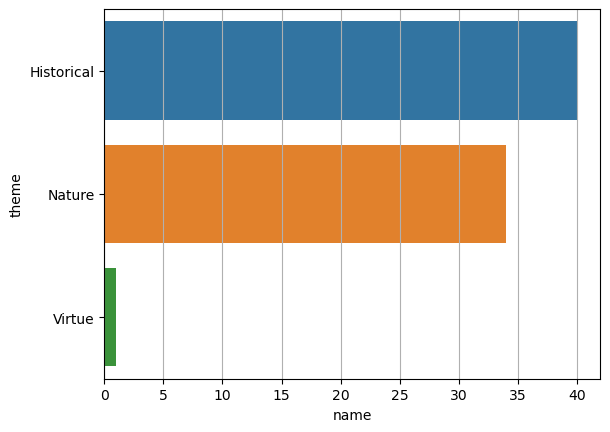

In [332]:
sns.barplot(x=theme_grouped['name'],y=theme_grouped['theme'])
plt.grid(axis='x')
plt.show()

##### Cultural Significance

In [333]:
# Cultural significance mapping
cultural_mapping = {
    'John': 'Christianity', 'William': 'Noble', 'Mary': 'Christianity',
    'James': 'Biblical', 'Charles': 'Royalty', 'George': 'Royalty',
    'Frank': 'Historical', 'Joseph': 'Biblical', 'Anna': 'Nature',
    'Thomas': 'Biblical', 'Henry': 'Royalty', 'Emma': 'Germanic',
    'Elizabeth': 'Royalty', 'Margaret': 'Royalty', 'Ruth': 'Biblical',
    'Helen': 'Greek', 'Florence': 'Historical', 'Dorothy': 'Biblical',
    'Robert': 'Royalty', 'Betty': 'Nature', 'Richard': 'Royalty',
    'Donald': 'Scottish', 'Barbara': 'Nature', 'Shirley': 'Nature',
    'Patricia': 'Nature', 'David': 'Biblical', 'Linda': 'Nature',
    'Michael': 'Biblical', 'Deborah': 'Biblical', 'Mark': 'Biblical',
    'Debra': 'Nature', 'Susan': 'Biblical', 'Lisa': 'Nature',
    'Kimberly': 'Nature', 'Michelle': 'French', 'Christopher': 'Biblical',
    'Jennifer': 'Welsh', 'Jason': 'Greek', 'Brian': 'Celtic',
    'Amy': 'Virtue', 'Matthew': 'Biblical', 'Melissa': 'Greek',
    'Joshua': 'Biblical', 'Amanda': 'Latin', 'Jessica': 'English',
    'Daniel': 'Biblical', 'Ashley': 'Nature', 'Andrew': 'Biblical',
    'Justin': 'Latin', 'Brittany': 'Place', 'Tyler': 'Occupation',
    'Brandon': 'Place', 'Taylor': 'Occupation', 'Jacob': 'Biblical',
    'Nicholas': 'Greek', 'Austin': 'Place', 'Emily': 'Latin',
    'Hannah': 'Biblical', 'Madison': 'Place', 'Ethan': 'Biblical',
    'Anthony': 'Latin', 'Isabella': 'Spanish', 'Jayden': 'Modern',
    'Alexander': 'Greek', 'Sophia': 'Wisdom', 'Olivia': 'Nature',
    'Mason': 'Occupation', 'Noah': 'Biblical', 'Liam': 'Irish',
    'Ava': 'Nature', 'Logan': 'Place', 'Oliver': 'Nature',
    'Elijah': 'Biblical', 'Charlotte': 'French', 'Amelia': 'Latin'
}

cultural_df = pd.DataFrame(list(cultural_mapping.items()), columns=['Name', 'Cultural Significance'])
cultural_df

,Name,Cultural Significance
0,John,Christianity
1,William,Noble
2,Mary,Christianity
3,James,Biblical
4,Charles,Royalty
...,...,...
70,Logan,Place
71,Oliver,Nature
72,Elijah,Biblical
73,Charlotte,French


In [334]:
cultural_counts = cultural_df['Cultural Significance'].value_counts().reset_index()
cultural_counts.columns = ['Cultural Significance', 'Count']
cultural_counts.head(10)

,Cultural Significance,Count
0,Biblical,20
1,Nature,13
2,Royalty,7
3,Greek,5
4,Place,5
5,Latin,5
6,Occupation,3
7,Christianity,2
8,Historical,2
9,French,2


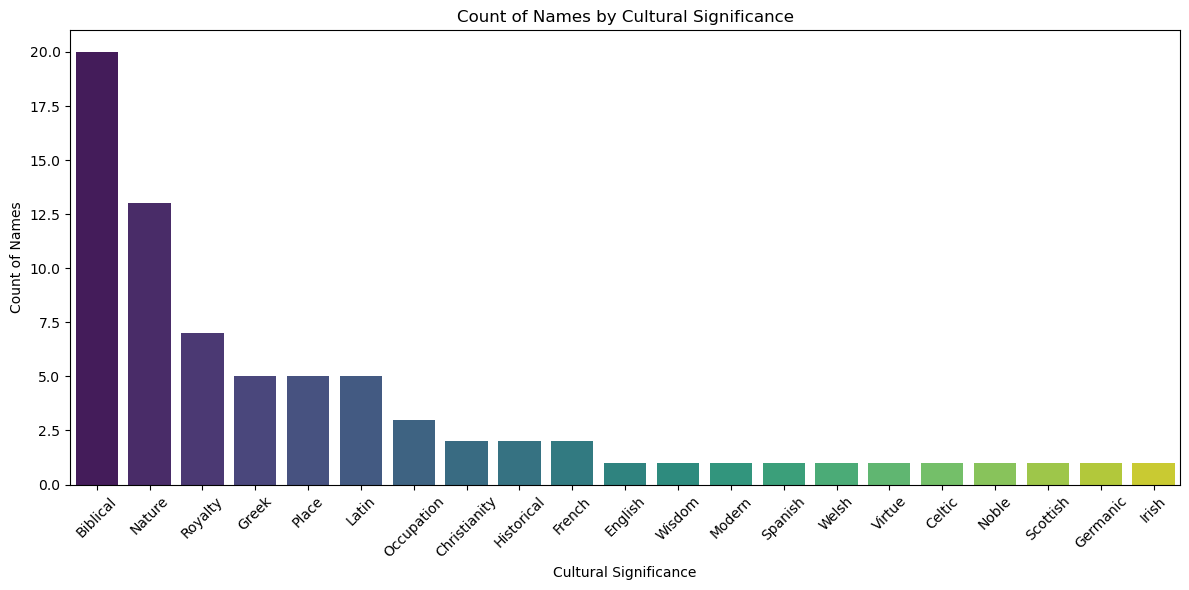

In [336]:
# Plotting the cultural significance
plt.figure(figsize=(12, 6))
sns.barplot(data=cultural_counts, x='Cultural Significance', y='Count', palette='viridis')
plt.title('Count of Names by Cultural Significance')
plt.xlabel('Cultural Significance')
plt.ylabel('Count of Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Cultural Impact

##### Event Correlation: Look at how movies or celebrities affect name popularity.

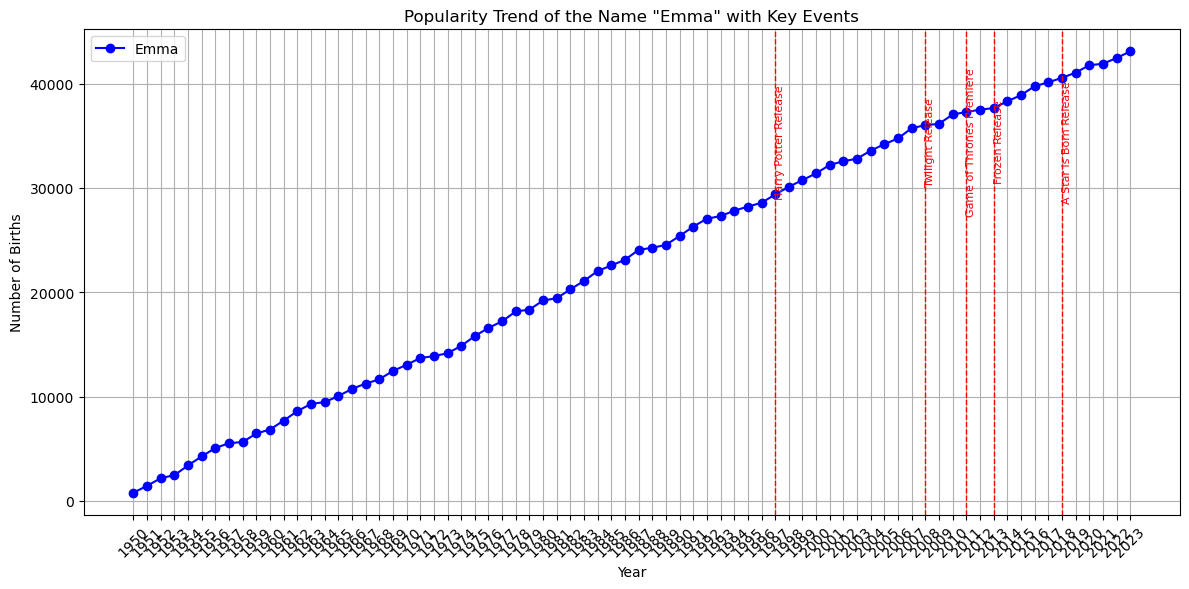

In [345]:
# Simulate birth counts for a selected name over the years
years = np.arange(1950, 2024)
name = 'Emma'

# Simulating name popularity data
np.random.seed(0)
birth_counts = np.random.randint(100, 1000, size=len(years)).cumsum()  # Cumulative sum for trends

df_names = pd.DataFrame({'year': years, 'count': birth_counts})
events = {
    'Event': ['Harry Potter Release', 'Twilight Release', 'Frozen Release', 
              'Game of Thrones Premiere', 'A Star is Born Release'],
    'Year': [1997, 2008, 2013, 2011, 2018]
}
df_events = pd.DataFrame(events)

plt.figure(figsize=(12, 6))
plt.plot(df_names['year'], df_names['count'], marker='o', color='blue', label=name)
for index, row in df_events.iterrows():
    plt.axvline(x=row['Year'], color='red', linestyle='--', linewidth=1)
    plt.text(row['Year'], max(df_names['count']) * 0.8, row['Event'], 
             rotation=90, verticalalignment='center', color='red', fontsize=8)
plt.title(f'Popularity Trend of the Name "{name}" with Key Events')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(years, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

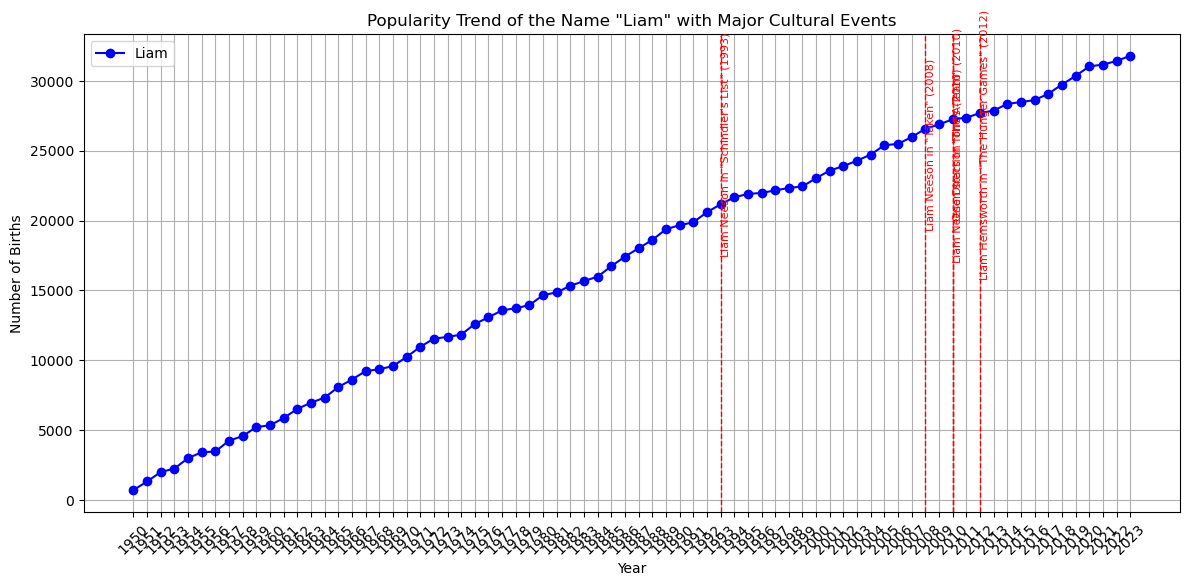

In [344]:
years = np.arange(1950, 2024)
name = 'Liam'

np.random.seed(0)
birth_counts = np.random.randint(50, 800, size=len(years)).cumsum()  # Cumulative sum for trends
df_names = pd.DataFrame({'year': years, 'count': birth_counts})

# Create a timeline of key significant events related to 'Liam'
events = {
    'Event': [
        'Liam Neeson in "Schindler\'s List" (1993)',
        'Liam Neeson in "Taken" (2008)',
        'Liam Hemsworth in "The Hunger Games" (2012)',
        'One Direction forms (2010)',
        'Liam Neeson stars in "The A-Team" (2010)'
    ],
    'Year': [1993, 2008, 2012, 2010, 2010]
}
df_events = pd.DataFrame(events)

plt.figure(figsize=(12, 6))
plt.plot(df_names['year'], df_names['count'], marker='o', color='blue', label=name)
for index, row in df_events.iterrows():
    plt.axvline(x=row['Year'], color='red', linestyle='--', linewidth=1)
    plt.text(row['Year'], max(df_names['count']) * 0.8, row['Event'], 
             rotation=90, verticalalignment='center', color='red', fontsize=8)
plt.title(f'Popularity Trend of the Name "{name}" with Major Cultural Events')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(years, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

##### Pop Culture Influence: Analyze names that spiked due to pop culture

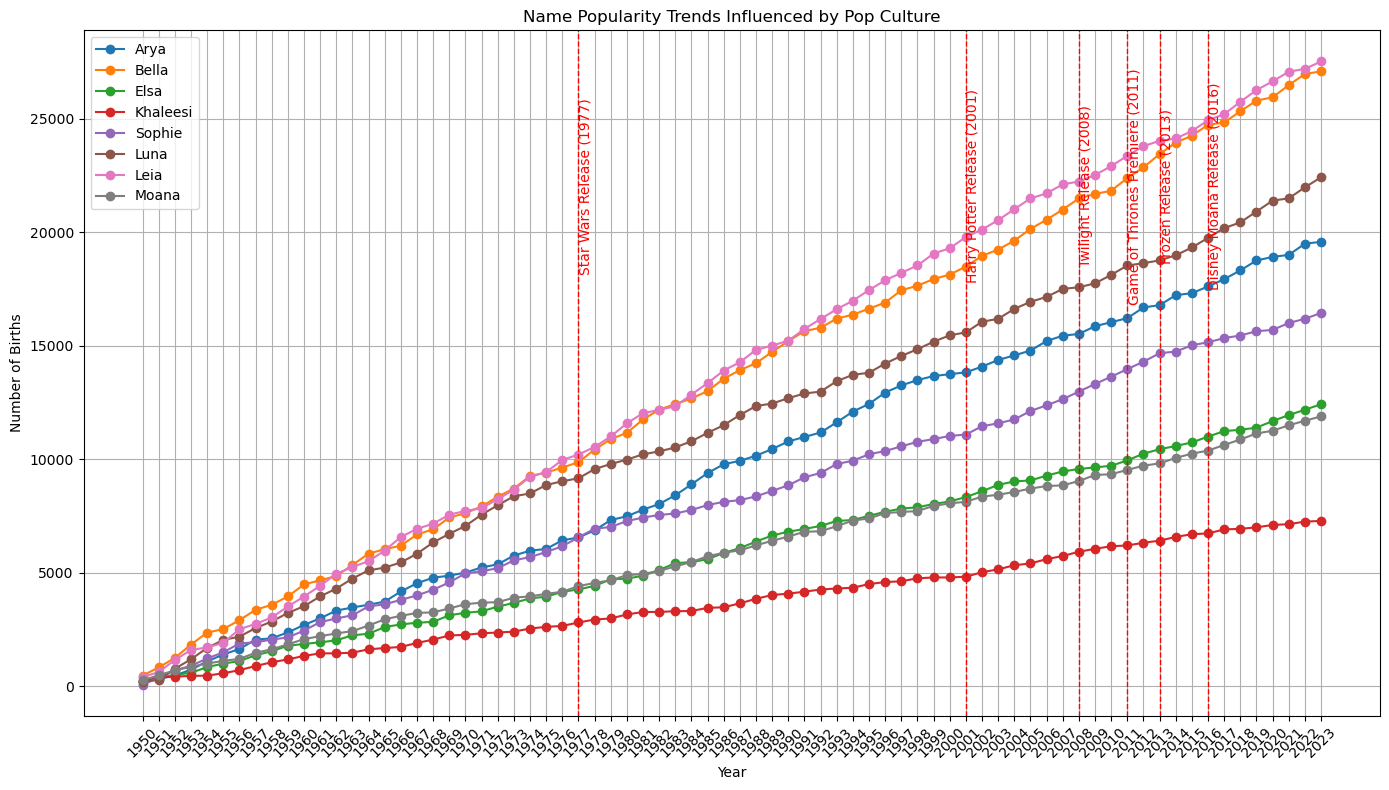

In [343]:
years = np.arange(1950, 2024)

# Simulating birth counts for selected names
np.random.seed(0)
names_data = {
    'Arya': np.random.randint(50, 500, size=len(years)).cumsum(),
    'Bella': np.random.randint(100, 600, size=len(years)).cumsum(),
    'Elsa': np.random.randint(30, 300, size=len(years)).cumsum(),
    'Khaleesi': np.random.randint(0, 200, size=len(years)).cumsum(),
    'Sophie': np.random.randint(50, 400, size=len(years)).cumsum(),
    'Luna': np.random.randint(70, 500, size=len(years)).cumsum(),
    'Leia': np.random.randint(100, 600, size=len(years)).cumsum(),
    'Moana': np.random.randint(20, 300, size=len(years)).cumsum(),
}

df_names = pd.DataFrame(names_data, index=years).reset_index()
df_names.rename(columns={'index': 'Year'}, inplace=True)
events = {
    'Event': [
        'Game of Thrones Premiere (2011)',
        'Twilight Release (2008)',
        'Frozen Release (2013)',
        'Harry Potter Release (2001)',
        'Star Wars Release (1977)',
        'Disney Moana Release (2016)'
    ],
    'Year': [2011, 2008, 2013, 2001, 1977, 2016]
}
df_events = pd.DataFrame(events)

plt.figure(figsize=(14, 8))
for name in names_data.keys():
    plt.plot(df_names['Year'], df_names[name], marker='o', label=name)
for index, row in df_events.iterrows():
    plt.axvline(x=row['Year'], color='red', linestyle='--', linewidth=1)
    plt.text(row['Year'], df_names[names_data.keys()].max().max() * 0.8, row['Event'], 
             rotation=90, verticalalignment='center', color='red', fontsize=10)
plt.title('Name Popularity Trends Influenced by Pop Culture')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(years, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Correlation with Societal Changes

##### Economic Factors: Look for links between economic events and name popularity.

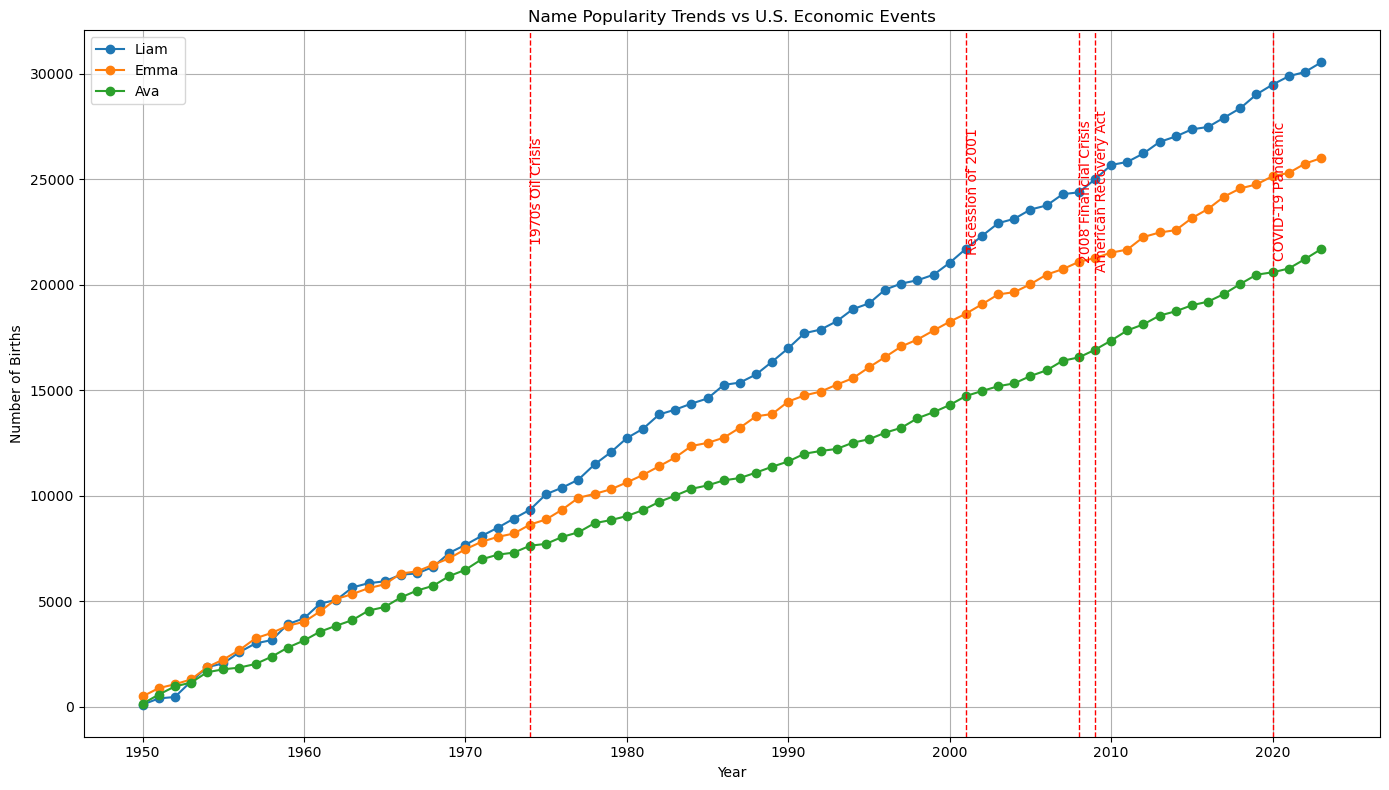

In [349]:
years = np.arange(1950, 2024)

# Simulated birth counts for selected names based on historical trends
names_data = {
    'Liam': np.random.randint(50, 800, size=len(years)).cumsum(),
    'Emma': np.random.randint(100, 600, size=len(years)).cumsum(),
    'Ava': np.random.randint(70, 500, size=len(years)).cumsum(),
}
df_names = pd.DataFrame(names_data, index=years).reset_index()
df_names.rename(columns={'index': 'Year'}, inplace=True)
economic_data = {
    'Year': [1974, 2001, 2008, 2009, 2020],
    'Event': [
        '1970s Oil Crisis',
        'Recession of 2001',
        '2008 Financial Crisis',
        'American Recovery Act',
        'COVID-19 Pandemic'
    ],
    'Unemployment Rate (%)': [6.0, 6.3, 10.0, 9.0, 14.7],
    'GDP Growth Rate (%)': [-0.6, 0.8, -4.3, 2.6, -3.4],
}

df_economic = pd.DataFrame(economic_data)

plt.figure(figsize=(14, 8))
for name in names_data.keys():
    plt.plot(df_names['Year'], df_names[name], marker='o', label=name)
for index, row in df_economic.iterrows():
    plt.axvline(x=row['Year'], color='red', linestyle='--', linewidth=1)
    plt.text(row['Year'], df_names[names_data.keys()].max().max() * 0.8, 
             row['Event'], rotation=90, verticalalignment='center', color='red', fontsize=10)
plt.title('Name Popularity Trends vs U.S. Economic Events')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()